# Patients' Heart Failure Record - EDA Approach


## By  Oby Ajah

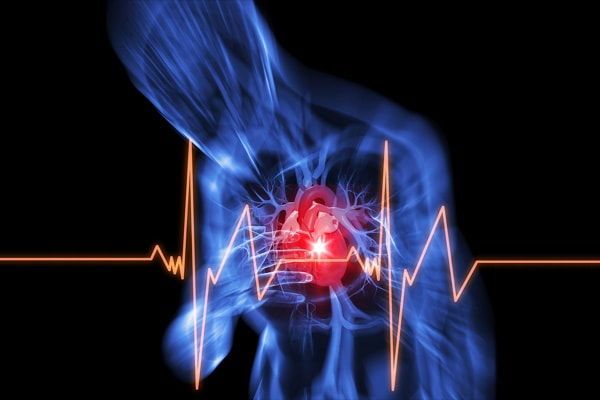

# Problem Statement


### Background

***
Cardiovascular diseases (CVDs) account for number one cause of death globally; WHO estimates that 17.9 million lives are lost each year as a result of CVD-related cases, this accounts for 31% of all deaths worlwide. Heart failure is a common event caused by CVDs; global efforts are to reduce complications and deathrates associated with CVDs. Behavioural changes like reduced intake of tobacco, increased involvements in physical activities, improved dieting, reduced intake of alcohol have been identified as ways of managing /reducing CVDs. St. Peter's Hospital patients' records with CVDs have identified one or more of these factors (diabetes, high blood pressure, smoking, ejection fraction, anaemia, serum creatinine, creatine phosphokinase among others) as indicators of heart failures and possibly death. 

As a recently hired Data Analyst of St. Peter's Hospital, you have been tasked to identifiy the relationships between these factors, and the possibilty of their leading to the development of heart failure and possibly death. The stakeholders will be present to listen to your findings as this will help in chanelling funds and efforts to the control of rapid heart failure cases hence, aid the decrease of death rates. 
***


## Objectives

* To carry out exploratory data analysis on the dataset
* To carry out directional hypothesis testing and how likely they are to lead to patients' death
* To create visualizations to illustrate the relationships between selected health-related metrics


## Dataset

***
The dataset was gotten from <a href="https://www.kaggle.com/datasets/dariatwardy/dataset?select=heart_failure_clinical_records_dataset+%28version+1%29.xlsb.csv" target=" _blank">Kaggle</a>; it contains health records of 299 patients with 12 health-related metrics and death event flag. Listed below are the health-related metrics contained in the dataset.


* **age:** Patient's age
* **anaemia:** Whether the patient is anaemic or not (given as 0=non-anaemic or 1=anaemic)
* **creatine_phosphokinase:** The amount of creatine phophokinase in a patient's blood
* **diabetes:** Whether the patient is diabetic or not (given as 0=non-diabetic or 1=diabetic)
* **ejection_fraction:** The amount of blood pumped in and out of the heart ventricle of a patient
* **high_blood_pressure:** Whether the patient has high blood pressure or not (given as 0=don't have HBP or 1=have HBP)
* **platelets:** The platelet count in the blood of the patient
* **serum_creatinine:** The level of serum creatinine level in the patient's blood
* **serum _sodium:** The serum sodium concentration in the patient's blood
* **sex:** The gender of the patient(given as 0=male or 1=female)
* **smoking:** Whether the patient is a smoker or not (given as 0=non-smoker or 1=smoker)
* **time:** The number of hours it takes for the patient to deteroriate 
* **DEATH_EVENT:** whether patients succumb to their ailment (given as 0=alive or 1=dead)
***

## Definition of Some Important Features

* <a href="https://www.mayoclinic.org/tests-procedures/creatinine-test/about/pac-20384646#:~:text=The%20typical%20range%20for%20serum,52.2%20to%2091.9%20micromoles%2FL" target=" _blank">Serum Creatinine</a>
* <a href="https://www.healthline.com/health/sodium-blood" target=" _blank">Serum Sodium</a>
* <a href="https://www.pennmedicine.org/updates/blogs/heart-and-vascular-blog/2022/april/ejection-fraction-what-the-numbers-mean#:~:text=Ejection%20fraction%20(EF)%20is%20a,pumped%20out%20with%20each%20heartbeat." target=" _blank">Ejection Fraction</a>
* <a href="https://www.hopkinslupus.org/lupus-tests/clinical-tests/creatine-phosphokinase-cpk/" target=" _blank">Creatine Phosphokinase</a>

## Importing necessary libraries

In [96]:
#Libraries that help in reading and manipulating data
import numpy as np
import pandas as pd 

#Libraries that help in data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# ^^^ pyforest auto-imports - don't write above this line

%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

#Libraries for statistical analysis
import scipy.stats
from scipy.stats import shapiro 
from scipy.stats import anderson
from scipy.stats import normaltest
import scipy.stats as stats
from scipy.stats import chi2
from numpy import sqrt
from scipy.stats import norm

## Reading the dataset

In [97]:
#Save filepath to a variable for easy assess
heart_records_path = "C:/Users/obyaj/.jupyter/heart_failure_clinical_records_dataset.csv"

#Read and store the data in dataframe titled heart_records_data
heart_records_data = pd.read_csv(heart_records_path)

## Overview of the dataset

### View the first and last 5 rows of the dataset

In [3]:
#Print the first five rows of the dataset
heart_records_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


* 5 rows, 13 columns

In [4]:
#Print the last five rows of the dataset
heart_records_data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


* 5 rows, 13 columns

## Understand the shape of the dataset

In [5]:
#Print the shape of the dataset
heart_records_data.shape

(299, 13)

* The dataset contains 299 rows and 13 columns

## Check if there are any duplicate rows in the dataset

In [6]:
heart_records_data.duplicated().any()

False

* No duplicate rows available

## Fixing the dataset

In [7]:
#To convert the "sex" information from "0 and 1" to "male and female" for easy comprehension
heart_records_data.sex.replace({0:"Male",1:"Female"},inplace=True)

In [8]:
#To convert the "anaemia" information from "0 and 1" to "Non-anaemic and Anaemic" for easy comprehension
heart_records_data.anaemia.replace({0:"Non-anaemic",1:"Anaemic"},inplace=True)

In [9]:
#To convert the "diabetes" information from "0 and 1" to "Non-diabetic and Diabetic" for easy comprehension
heart_records_data.diabetes.replace({0:"Non-diabetic",1:"Diabetic"},inplace=True)

In [10]:
#To convert the "high_blood_pressure" information from "0 and 1" to "Non-hypertensive and Hypertensive" for easy comprehension
heart_records_data.high_blood_pressure.replace({0:"Non-hypertensive",1:"Hypertensive"},inplace=True)

In [11]:
#To convert the "DEATH_EVENT" information from "0 and 1" to "Alive and Dead" for easy comprehension
heart_records_data.DEATH_EVENT.replace({0:"Alive",1:"Dead"},inplace=True)

In [12]:
#To convert the "smoking" information from "0 and 1" to "Non-smoker and Smoker" for easy comprehension
heart_records_data.smoking.replace({0:"Non-smoker",1:"Smoker"},inplace=True)

In [13]:
#To check if the re-arrangement of the dataset has taken place
heart_records_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,Non-anaemic,582,Non-diabetic,20,Hypertensive,265000.00,1.9,130,Female,Non-smoker,4,Dead
1,55.0,Non-anaemic,7861,Non-diabetic,38,Non-hypertensive,263358.03,1.1,136,Female,Non-smoker,6,Dead
2,65.0,Non-anaemic,146,Non-diabetic,20,Non-hypertensive,162000.00,1.3,129,Female,Smoker,7,Dead
3,50.0,Anaemic,111,Non-diabetic,20,Non-hypertensive,210000.00,1.9,137,Female,Non-smoker,7,Dead
4,65.0,Anaemic,160,Diabetic,20,Non-hypertensive,327000.00,2.7,116,Male,Non-smoker,8,Dead


**The dataset is now interpretable**

## Check the data types of the columns in the dataset

In [14]:
heart_records_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    object 
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    object 
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    object 
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    object 
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 30.5+ KB


### Observations:

* There are no null values contained in the dataset
* There are 10 integers and 3 floats in the dataset

## Get the summary of the dataset

In [15]:
#Get the statistical information about the dataset
heart_records_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
time,299.0,130.260870,77.614208,4.0,73.0,115.0,203.0,285.0


* 7 rows, 8 columns

### Observations:

* Age of the patients range from 40 years to 95 years; though the avearge age of the patients is 61 years
* Normal platelet count ranges from 150,000 to 450,000 per microliter of blood; from the dataset, 25th percentile of the patients have a platelet count of 212,500 or below while 75th percentile of them have platelet count of 303,500 or below. So, majority of the patients have platelet counts that can be considered normal
* Creatinine phosphokinase values of the patients are relatively high as more than 75 % of them have their creatinine phosphokinase value of more than 250 mcg/L, with the highest value being 7,861 mcg/L. Meanwhile, the normal creatinine phosphokinase value ranges from 10 to 120 mcg/L.
* Ejection fraction of the patients are low considering that the normal ejection fraction is about 50 % to 70 %
* Serum sodium level of the patients are fairly okay because the normal level of serum sodium in the blood is about 135 to 145 mEq/L 
* Normal serum creatinine range for adult male is 0.74 to 1.35 mg/dL while adult female has 0.59 to 1.04 mg/dL; however, judging from the dataset, 75 % of the patients have normal ranges of serum creatinine in their blood system 

In [16]:
#Get the statistical relationships between variables
heart_records_data.corr()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
age,1.000000,-0.081584,0.060098,-0.052354,0.159187,-0.045966,-0.224068
creatinine_phosphokinase,-0.081584,1.000000,-0.044080,0.024463,-0.016408,0.059550,-0.009346
ejection_fraction,0.060098,-0.044080,1.000000,0.072177,-0.011302,0.175902,0.041729
platelets,-0.052354,0.024463,0.072177,1.000000,-0.041198,0.062125,0.010514
serum_creatinine,0.159187,-0.016408,-0.011302,-0.041198,1.000000,-0.189095,-0.149315
serum_sodium,-0.045966,0.059550,0.175902,0.062125,-0.189095,1.000000,0.087640
time,-0.224068,-0.009346,0.041729,0.010514,-0.149315,0.087640,1.000000


* 7 rows, 7 columns

### Observations:

* There is no linear relationship between these variables 

In [17]:
#Get the statistical distribution of the variables
cols_cat = heart_records_data.select_dtypes(['int64'])
for i in cols_cat.columns:
    print('Mean of' ,i, 'is:')
    print(cols_cat[i].mean())
    print('Median of' ,i, 'is:')
    print(cols_cat[i].median())
    print('Mode of' ,i, 'is:')
    print(cols_cat[i].mode())
    print('*'*50)
    
    heart_records_data.select_dtypes(exclude="object").nunique()

Mean of creatinine_phosphokinase is:
581.8394648829432
Median of creatinine_phosphokinase is:
250.0
Mode of creatinine_phosphokinase is:
0    582
Name: creatinine_phosphokinase, dtype: int64
**************************************************
Mean of ejection_fraction is:
38.08361204013378
Median of ejection_fraction is:
38.0
Mode of ejection_fraction is:
0    35
Name: ejection_fraction, dtype: int64
**************************************************
Mean of serum_sodium is:
136.62541806020067
Median of serum_sodium is:
137.0
Mode of serum_sodium is:
0    136
Name: serum_sodium, dtype: int64
**************************************************
Mean of time is:
130.2608695652174
Median of time is:
115.0
Mode of time is:
0    187
1    250
Name: time, dtype: int64
**************************************************


## Exploring the unique values of all the metrics

In [18]:
#Get the count of unique values in the columns
cols_cat = heart_records_data.select_dtypes(['int64'])
for i in cols_cat.columns:
    print('Unique values in' ,i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in creatinine_phosphokinase are :
582     47
66       4
129      4
231      3
69       3
        ..
748      1
1876     1
936      1
292      1
2413     1
Name: creatinine_phosphokinase, Length: 208, dtype: int64
**************************************************
Unique values in ejection_fraction are :
35    49
38    40
40    37
25    36
30    34
60    31
50    21
45    20
20    18
55     3
15     2
62     2
17     2
65     1
14     1
80     1
70     1
Name: ejection_fraction, dtype: int64
**************************************************
Unique values in serum_sodium are :
136    40
137    38
140    35
134    32
138    23
139    22
135    16
132    14
141    12
142    11
133    10
145     9
130     9
144     5
131     5
127     3
143     3
128     2
129     2
121     1
116     1
146     1
126     1
124     1
113     1
125     1
148     1
Name: serum_sodium, dtype: int64
**************************************************
Unique values in time are :
250    7
187    7
10 

In [19]:
#Get the number of unique values in the columns
heart_records_data.select_dtypes(exclude="object").nunique()

age                          47
creatinine_phosphokinase    208
ejection_fraction            17
platelets                   176
serum_creatinine             40
serum_sodium                 27
time                        148
dtype: int64

In [20]:
#Get the percentage of missing values per column
heart_records_data.isnull().sum()/heart_records_data.shape[0] *100

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

**There are no missing values in the dataset**

## Exploratory Data Analysis

### Univariate Analysis

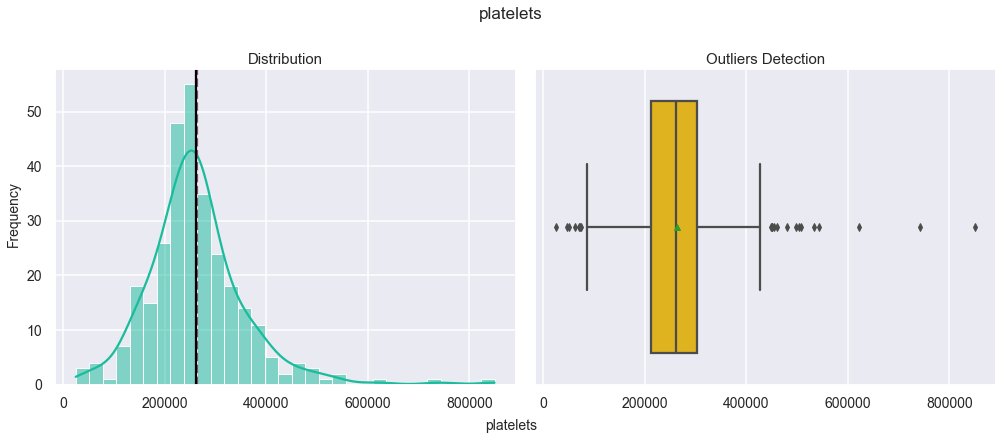

In [23]:
#Get platelets distribution of the patients
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("platelets", fontsize=17)
fig.text(0.5, 0.0016, 'platelets', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(heart_records_data, x='platelets', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(heart_records_data['platelets']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(heart_records_data['platelets']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=heart_records_data['platelets'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers Detection",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()                              

### Observations:

* The patients' platelets are not normally distributed 
* There are outliers in the minimun and maximum axes; meaning that platelets counts of some patients are well below 150,000 and dangerously above 450,000. These extremes are too critical, and can easily lead to death if not controlled on time

**Since there are many outliers, let's investigate the kurtosis of the distribution**

In [24]:
#To find out the skewness and kurtosis of platelets
print('skewness-kurtosis all: {}'.format(heart_records_data['platelets'].kurt()))

skewness-kurtosis all: 6.209254515302208


**The platelets' distribution is skewed to the right, and the kurtosis is 3.21 in excess of a normal kurtosis; it, therefore, has a leptokurtic distribution with many outliers of several extreme observations. It, therefore means that patients that fall within these outliers are at risk of serious health complications because normal platelet count is between 150,00 to 450,000**

* <a href="https://www.scribbr.com/statistics/kurtosis/#:~:text=Kurtosis%20is%20a%20measure%20of,(thin%20tails)%20are%20platykurtic." target=" _blank">Leptokurtic Distribution</a>

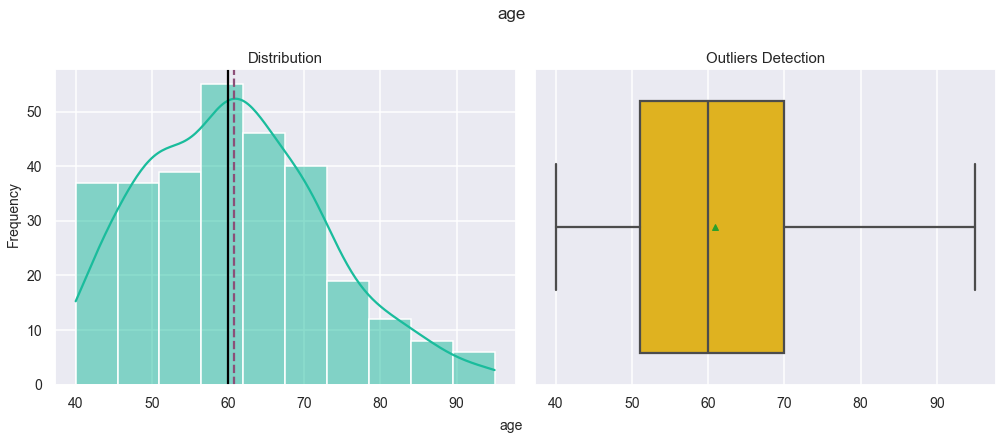

In [25]:
#Get age distribution of the patients
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("age", fontsize=17)
fig.text(0.5, 0.0016, 'age', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(heart_records_data, x='age', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(heart_records_data['age']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(heart_records_data['age']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=heart_records_data['age'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers Detection",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

### Observation:

* The age of the patients has no outlier, and has 25th percentile of the patients' age is below 52 years 
* Their ages range from 40 years to 95 years with a mean age of 61 years
* The distribution of their age is flat, and skewed more to the right 

In [26]:
#To find out the skewness and kurtosis of age
print('skewness-kurtosis all: {}'.format(heart_records_data['age'].kurt()))

skewness-kurtosis all: -0.18487053195417413


**The age of the patients is flatly distributed with negative kurtosis of -3.19; it therefore has platykurtic distribution. This means that the age distribution of patients are well distributed and there's nothing out of the ordinary; it is assumed that once an adult reaches the age of 40, he/she should put more effort to carry out frequent routine test regarding his or her health**
* <a href="https://www.scribbr.com/statistics/kurtosis/#:~:text=Kurtosis%20is%20a%20measure%20of,(thin%20tails)%20are%20platykurtic." target=" _blank">Platykurtic Distribution</a>

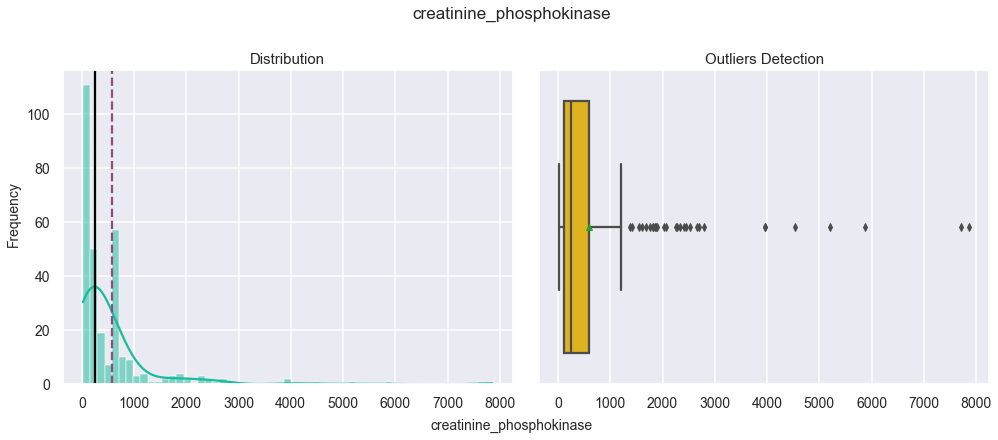

In [27]:
#Get creatinine_phosphokinase distribution of the patients
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("creatinine_phosphokinase", fontsize=17)
fig.text(0.5, 0.0016, 'creatinine_phosphokinase', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(heart_records_data, x='creatinine_phosphokinase', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(heart_records_data['creatinine_phosphokinase']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(heart_records_data['creatinine_phosphokinase']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=heart_records_data['creatinine_phosphokinase'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers Detection",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

### Observations:

* The creatinine phosphokinase values of the patients have many outliers at the maximum axis; this means that the creatinine phosphokinase values of some patients are dangerously high
* The 25th to 75th percentile creatinine phosphokinase value is well within 600 
* The creatinine phosphokinase value of patients has exponential distribution

In [28]:
#To find out the skewness and kurtosis of creatinine phosphokinase
print('skewness-kurtosis all: {}'.format(heart_records_data['creatinine_phosphokinase'].kurt()))

skewness-kurtosis all: 25.1490461965808


**The creatinine phosphokinase of the patients is deeply skewed to the right, depicting an exponential distribution; since the kurtosis has an excess of 22.15, it is also leptokurtically distributed. This means that patients whose creatinine phosphokinase level fall within the outliers need to be admitted in the ICU because their conditions are critical: normal creatinine phosphokinase level is between 10 to 120 mcg/L**
* <a href="https://www.itl.nist.gov/div898/handbook/eda/section3/eda351.htm" target=" _blank">Exponential Distribution</a>

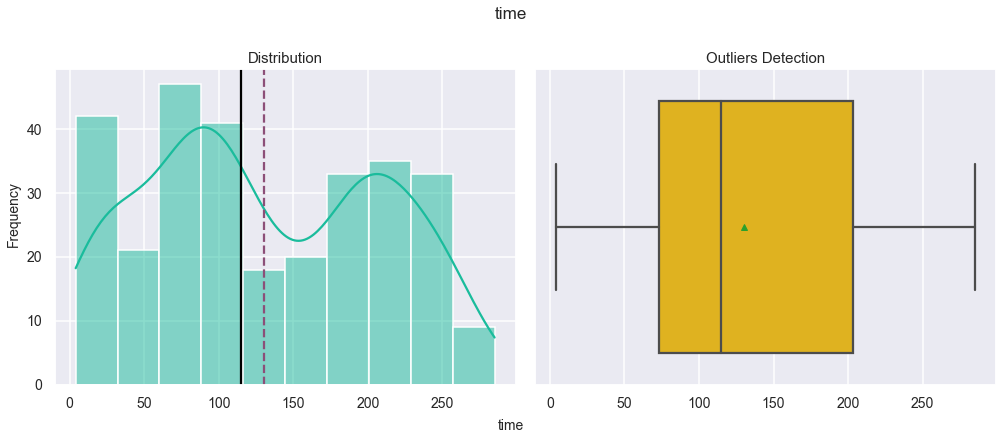

In [29]:
#Get time distribution of the patients
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("time", fontsize=17)
fig.text(0.5, 0.0016, 'time', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(heart_records_data, x='time', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(heart_records_data['time']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(heart_records_data['time']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=heart_records_data['time'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers Detection",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

In [30]:
#To find out the skewness and kurtosis of creatinine phosphokinase
print('skewness-kurtosis all: {}'.format(heart_records_data['time'].kurt()))

skewness-kurtosis all: -1.2120479666763422


**Time also has platykurtic distribution; meaning that it is practically impossible for one to give an exact time for someone to die as a result of some heart-related issue**

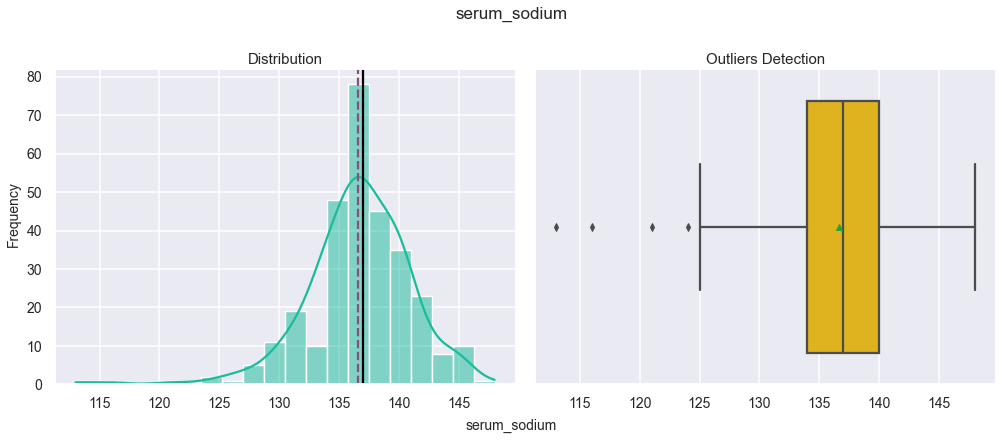

In [31]:
#Get serum sodium distribution of the patients
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("serum_sodium", fontsize=17)
fig.text(0.5, 0.0016, 'serum_sodium', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(heart_records_data, x='serum_sodium', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(heart_records_data['serum_sodium']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(heart_records_data['serum_sodium']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=heart_records_data['serum_sodium'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers Detection",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

### Observations:

* Serum sodium levels of patients is fairly normally distributed but skewed to the left
* The 25th percentile of the patients have serum sodium level of 134 while the maximum level is 148. There is however, outlier at the minimum axis; this means that the serum sodium level in the blood stream of some patients are too low
* Let's investigate the kurtosis of these outliers

In [32]:
#To find out the skewness and kurtosis of serum sodium
print('skewness-kurtosis all: {}'.format(heart_records_data['serum_sodium'].kurt()))

skewness-kurtosis all: 4.119712007624292


**Serum sodium levels of patients are medium-tailed with less frequent outliers; the kurtosis is a little above 3, having an excess of 1.12 which makes it a mesokurtic distribution. Since the serum sodium of some patients fall well below the normal range, some medication need to be administered to them, and they will be closely monitored so that their serum sodium can be raised to the normal level**
* <a href="https://www.scribbr.com/statistics/kurtosis/#:~:text=Kurtosis%20is%20a%20measure%20of,(thin%20tails)%20are%20platykurtic." target=" _blank">Mesokurtic Distribution</a>

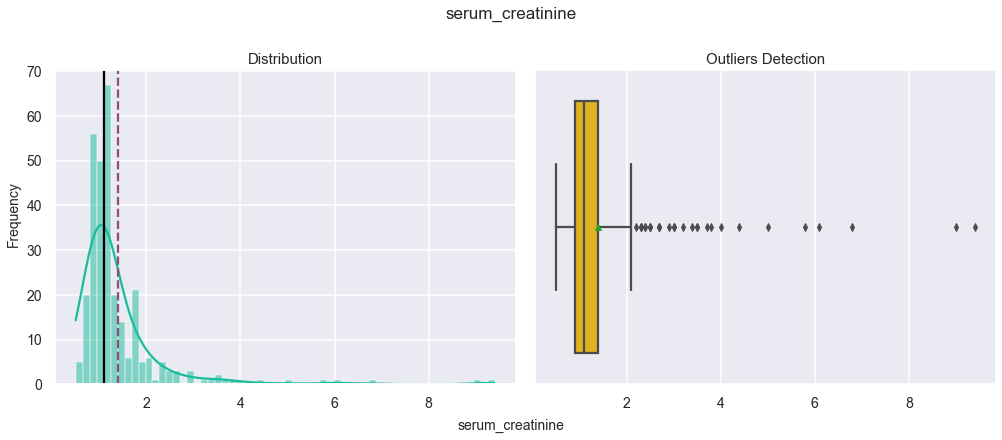

In [33]:
#Get serum_creatinine distribution of the patients
fig, axes = plt.subplots(1,2,figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
fig.suptitle("serum_creatinine", fontsize=17)
fig.text(0.5, 0.0016, 'serum_creatinine', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14)
sns.set_style("darkgrid",{"axes.facecolour":".9"})
sns.set_context('talk')

ax1=sns.histplot(heart_records_data, x='serum_creatinine', kde=True, color= '#1abc9c', ax=axes[0])
ax1.axvline(np.mean(heart_records_data['serum_creatinine']), color='#8C4F78',linestyle='--')
ax1.axvline(np.median(heart_records_data['serum_creatinine']), color='#000000',linestyle='-')
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.boxplot(x=heart_records_data['serum_creatinine'], color='#FFC300',showmeans=True, ax=axes[1])
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax2.tick_params(labelsize=14)

fontsize=15
ax1.set_title("Distribution",fontdict={'fontsize': fontsize})
ax2.set_title("Outliers Detection",fontdict={'fontsize': fontsize})

fig.tight_layout()
fig.show()

### Observations:

* The serum creatinine levels of patients are generally distributed exponentionally and skwed to the right; the mean is greater than the median
* The 25th to 75th percentile of serum creatinine of patients are within 1 but there are outliers in the maximum axis

In [34]:
#To find out the skewness and kurtosis of serum sodium
print('skewness-kurtosis all: {}'.format(heart_records_data['serum_creatinine'].kurt()))

skewness-kurtosis all: 25.828238661132016


**The serum creatinine of the patients is deeply skewed to the right, depicting an exponential distribution; since the kurtosis has an excess of 22.83, it is also leptokurtically distributed. Some patients' serum creatinine are extremely high reaching a value of 9 mg/dL meanwhile, the normal serum creatinine value is between 0.74 to 1.35 mg/dL; urgent medical attention is therefore required for such patients**

## Bivariant Analysis

### Directional Hypothesis Testing

* **H0:** μ = age (age of a patient will have no effect on these health-related metrics)
* **HA:** μ > age (the older a patient is, the more severe will these health-related metrics be)

#### 1. Severity of some CVDs indicators on patients over 80 years old

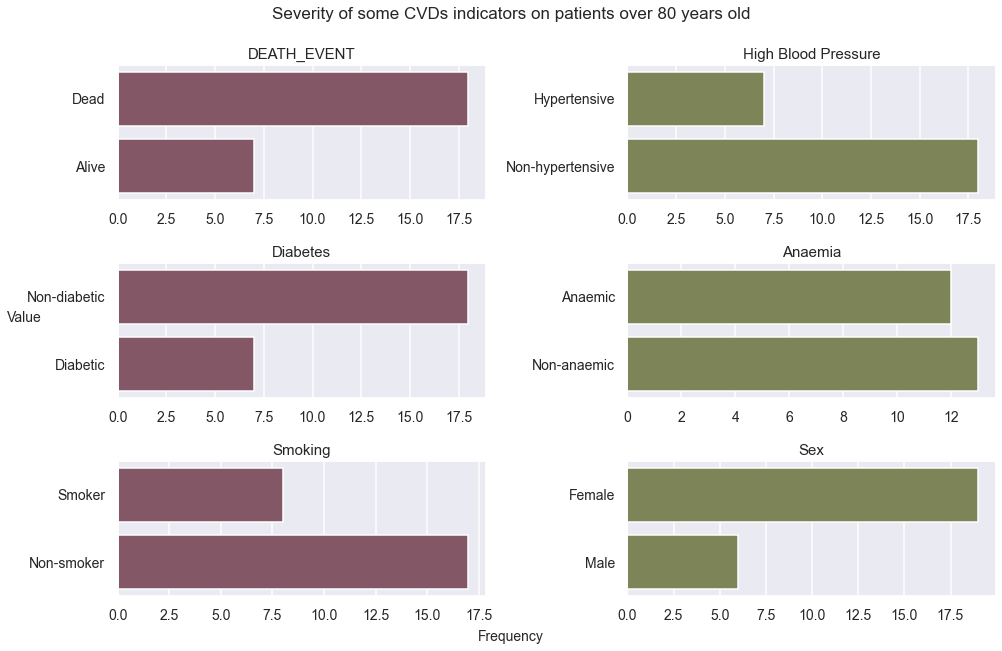

In [35]:
#Comparing health parameters of patients over 80 years
fig, axes = plt.subplots(3, 2, figsize=(14, 9))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
fig.suptitle("Severity of some CVDs indicators on patients over 80 years old", fontsize=17)
fig.text(0.5, 0.0016, 'Frequency', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Value', va='center', rotation='horizontal', fontsize=14)
sns.set_context('talk')

ax1=sns.countplot(y=heart_records_data[heart_records_data.age >= 80]['DEATH_EVENT'], color= '#8C4F63',ax=axes[0,0])
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.countplot(y=heart_records_data[heart_records_data.age >= 80]['high_blood_pressure'], color='#828C4F', ax=axes[0,1])
ax2.tick_params(labelsize=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3=sns.countplot(y=heart_records_data[heart_records_data.age >= 80]['diabetes'], color='#8C4F63',ax=axes[1,0])
ax3.tick_params(labelsize=14)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax4=sns.countplot(y=heart_records_data[heart_records_data.age >= 80]['anaemia'], color='#828C4F', ax=axes[1,1])
ax4.tick_params(labelsize=14)
ax4.set(xlabel=None)
ax4.set(ylabel=None)
ax5=sns.countplot(y=heart_records_data[heart_records_data.age >= 80]['smoking'], color='#8C4F63',ax=axes[2,0])
ax5.tick_params(labelsize=14)
ax5.set(xlabel=None)
ax5.set(ylabel=None)
ax6=sns.countplot(y=heart_records_data[heart_records_data.age >= 80]['sex'], color='#828C4F', ax=axes[2,1])
ax6.tick_params(labelsize=14)
ax6.set(xlabel=None)
ax6.set(ylabel=None)

fontsize=15
ax1.set_title("DEATH_EVENT",fontdict={'fontsize': fontsize})
ax2.set_title("High Blood Pressure",fontdict={'fontsize': fontsize})
ax3.set_title("Diabetes",fontdict={'fontsize': fontsize})
ax4.set_title("Anaemia",fontdict={'fontsize': fontsize})
ax5.set_title("Smoking",fontdict={'fontsize': fontsize})
ax6.set_title("Sex",fontdict={'fontsize': fontsize})


fig.tight_layout()
fig.show()

### Observations:

* About 30 % of the population of patients above the age of 80 years old are diabetic and had high blood pressure, 32 % of them are smokers, while 48 % of them are anaemic. 
* Within this population of pateients, 70 % of them are females, and 70 % deaths were recorded 
* Anaemia happen to be the most prevalent ailment among the patients within this age bracket 

#### 2. Severity of some CVDs indicators on patients below 50 years old

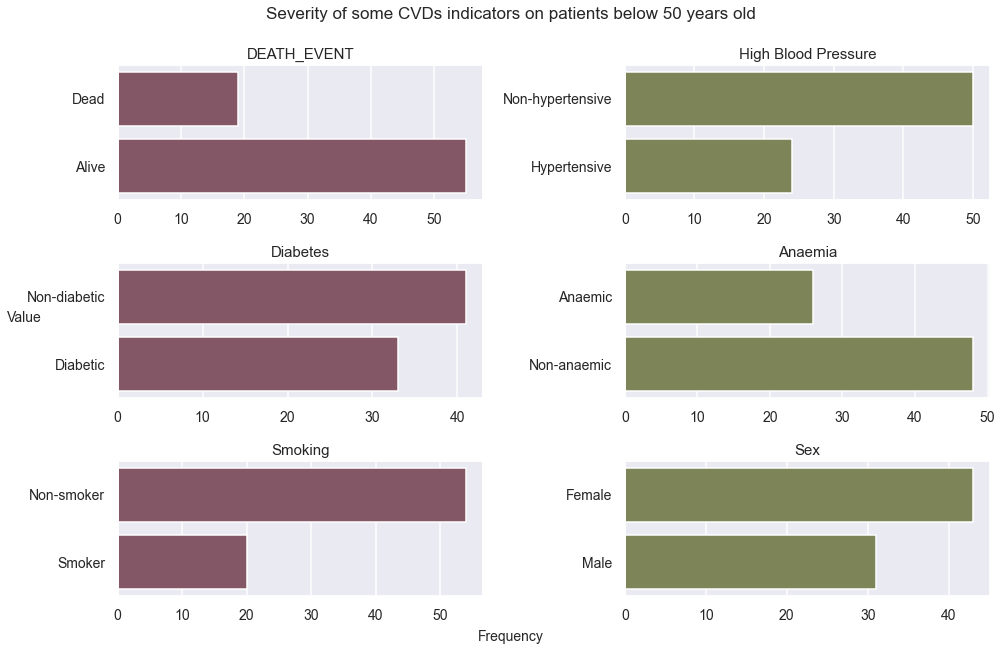

In [36]:
#Comparing health parameters of patients below 50 years
fig, axes = plt.subplots(3, 2, figsize=(14, 9))
plt.subplots_adjust(hspace=0.6, wspace=0.5)
fig.suptitle("Severity of some CVDs indicators on patients below 50 years old", fontsize=17)
fig.text(0.5, 0.0016, 'Frequency', ha='center', fontsize=14)
fig.text(0.00001, 0.5, 'Value', va='center', rotation='horizontal', fontsize=14)
sns.set_context('talk')

ax1=sns.countplot(y=heart_records_data[heart_records_data.age <= 50]['DEATH_EVENT'], color= '#8C4F63',ax=axes[0,0])
ax1.tick_params(labelsize=14)
ax1.set(xlabel=None)
ax1.set(ylabel=None)
ax2=sns.countplot(y=heart_records_data[heart_records_data.age <= 50]['high_blood_pressure'], color='#828C4F', ax=axes[0,1])
ax2.tick_params(labelsize=14)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
ax3=sns.countplot(y=heart_records_data[heart_records_data.age <= 50]['diabetes'], color='#8C4F63',ax=axes[1,0])
ax3.tick_params(labelsize=14)
ax3.set(xlabel=None)
ax3.set(ylabel=None)
ax4=sns.countplot(y=heart_records_data[heart_records_data.age <= 50]['anaemia'], color='#828C4F', ax=axes[1,1])
ax4.tick_params(labelsize=14)
ax4.set(xlabel=None)
ax4.set(ylabel=None)
ax5=sns.countplot(y=heart_records_data[heart_records_data.age <= 50]['smoking'], color='#8C4F63',ax=axes[2,0])
ax5.tick_params(labelsize=14)
ax5.set(xlabel=None)
ax5.set(ylabel=None)
ax6=sns.countplot(y=heart_records_data[heart_records_data.age <= 50]['sex'], color='#828C4F', ax=axes[2,1])
ax6.tick_params(labelsize=14)
ax6.set(xlabel=None)
ax6.set(ylabel=None)

ntsize=15
ax1.set_title("DEATH_EVENT",fontdict={'fontsize': fontsize})
ax2.set_title("High Blood Pressure",fontdict={'fontsize': fontsize})
ax3.set_title("Diabetes",fontdict={'fontsize': fontsize})
ax4.set_title("Anaemia",fontdict={'fontsize': fontsize})
ax5.set_title("Smoking",fontdict={'fontsize': fontsize})
ax6.set_title("Sex",fontdict={'fontsize': fontsize})


fig.tight_layout()
fig.show()

### Observations:

* Surprisingly, about 27 % of the population of patients below the age of 50 years are smokers; this is surprising because it is expected that the older one gets, one will know that smoking is dangerous to health. So, for the senior citizens to have more smokers than the patients below 50 years is quite unsettling
* Patients within this age bracket have more percentage of high blood pressure sufferers and diabetics (33 % and 44 % respectively) than the patients above 80 years. The higher percentage of HBP sufferers may be due to the fact that patients within this age bracket are actively involved in professional activities hence, incur more stress to themselves. The higher number of diabetics may also be related to the eating habits of this group of professionally overactive group of patients.
* About 35 % of patients within this age group  are anaemic, and 27 % of death were recorded.
* There is also about 60 % of females patients within this age bracket 


### Conclusion:

**Age of patients contribute to the severity of cardiovascular-related diseases but other factors like eating habit and sedentry lifestyle also play a part**

* <a href="https://www.statology.org/directional-hypothesis/" target=" _blank">Directional Hypothesis</a>

## Bivariate Analysis

### Establishing the relationship between 2 variables 

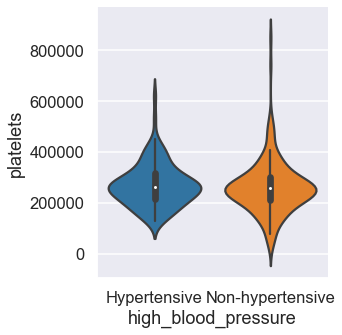

In [37]:
#Assessing how high blood pressure impacts platelet counts
g = sns.catplot(data = heart_records_data, x = 'high_blood_pressure', y = 'platelets', kind = 'violin', rotation = 'vertical');
plt.show() 

### Observations:

* Hypertensive patients have platelet counts that are within the normal range
* Non-hypertensive patients have very low platelet counts, and extremely high platelet counts
* Platelets are small fragments in the blood that forms clots that stops bleeding while high blood pressure is a condition that forces pressure in the blood to be high thereby pushing against the artery walls

### Conclusion:
* Non-hypertensive patients will only concentrate on taking medications that will lower their platelet counts; while those with normal platelet count will be taking medications to lower their blood pressure. In that way, the medications will not react with each other and cause further problems in the patients' system  

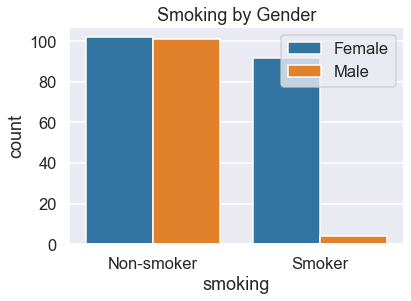

In [38]:
#Checking the quotient of smokers between the male and female patients
sns.countplot(data=heart_records_data, x = 'smoking' , hue = 'sex')
plt.title('Smoking by Gender')
plt.legend(loc="upper right");

### Observation:

* There are more female smokers than male smokers

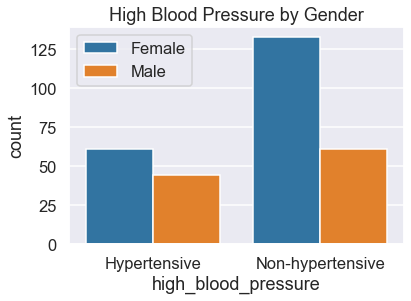

In [39]:
#Checking the segregation of male and female patients with high blood pressure
sns.countplot(data=heart_records_data, x = 'high_blood_pressure' , hue = 'sex')
plt.title('High Blood Pressure by Gender')
plt.legend(loc="upper left");

### Observation:

* The population of female patients with high blood pressure out numbers the number of male patients with high blood pressure 

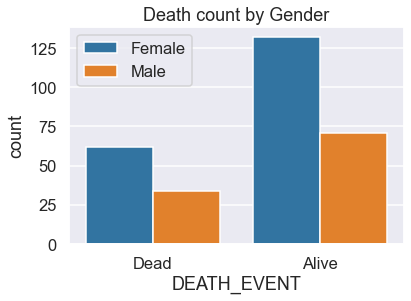

In [40]:
#Checking the number of deaths recorded between the male and female patients
sns.countplot(data=heart_records_data, x = 'DEATH_EVENT' , hue = 'sex')
plt.title('Death count by Gender')
plt.legend(loc="upper left");

### Observation:

* Again, the death rates of female patients is higher than that of the male patients 

### Conclusion:

**The death rate of female patients outweighs that of the male patients; this is not surprising because the number of female patients with high blod pressure and the number of female patients that are smokers are higher than those of the male patients. Smoking and high blood pressure are generally known to cause heart diseases which eventually leads to death in extreme cases. So, female patients must be counselled to quit smoking as well as given some high blood pressure medication to control their blood pressure**

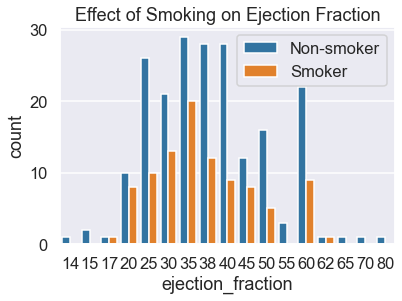

In [74]:
#Assessing the distribution of smokers with ejection fraction
sns.countplot(data=heart_records_data, x = 'ejection_fraction' , hue = 'smoking')
plt.title('Effect of Smoking on Ejection Fraction')
plt.legend(loc="upper right");

### Observations:

* The normal range of ejection fraction is 50 to 70 %: the number of patients that fall within the normal range is relatively small compared to patients with low ejection fraction
* Within the population of patients that have normal ejection fraction percentage, the number of non-smokers outnumbers the number of smokers; similar trend was observed within the population of patients with low ejection fraction percentage 

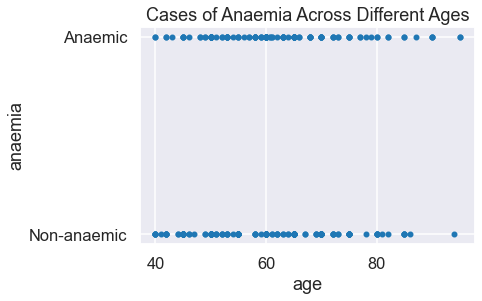

In [75]:
#Checking the age bracket of the patients with anaemia
heart_records_data.plot(x = 'age', y = 'anaemia', kind = 'scatter')
plt.title('Cases of Anaemia Across Different Ages')
plt.show() 

### Observation:

* Patients within the ages of 50 to 65 years old have prevalent cases of anaemia but patients aged 80 to 95 years old have less cases of anaemia. This is strange, and needs to be investigated further. 

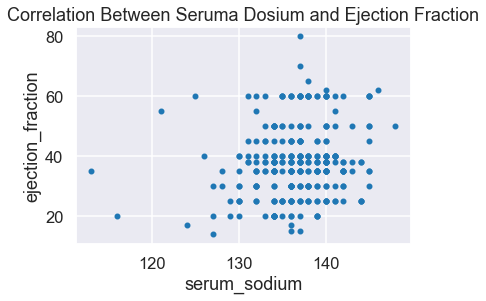

In [76]:
#Checking the correlation between serum sodium and ejection fraction
heart_records_data.plot(x = 'serum_sodium', y = 'ejection_fraction', kind = 'scatter')
plt.title('Correlation Between Seruma Dosium and Ejection Fraction')
plt.show() 

### Observations:

* Normal serum sodium level is between 135 to 145mEq/L while that of ejection fraction is 50 to 70 %. 
* Patients whose serum sodium level fell within the normal range are more than patients whose serum sodium level are either higher or lower
* Patients with low ejection fraction are higher than patients whose ejection fraction fell within the normal range 

## Multivariant Analysis


### Assessing the Relationships Three or More Variables in the Dataset

Text(0.5, 1.0, 'Levels of Serum Sodium and Creatinine Phosphokinase Among Smokers')

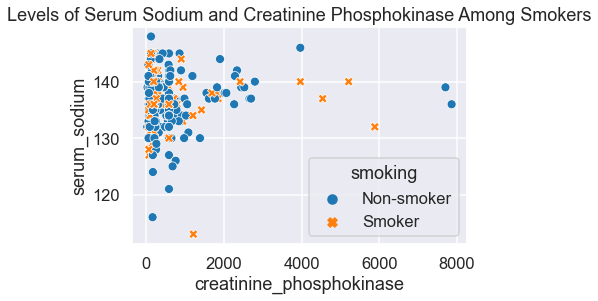

In [78]:
#Checking the connection between creatinine phosphokinase, serum sodium and smokers
sns.scatterplot(data=heart_records_data, x="creatinine_phosphokinase", y="serum_sodium", hue="smoking", style="smoking")
plt.title('Levels of Serum Sodium and Creatinine Phosphokinase Among Smokers')

### Observation

* There are a handful of smokers within the population of patients with normal serum sodium and creatinine phosphokinase values
* Majority of patients with dangerously high creatinine phosphokinase values are non-smokers

Text(0.5, 1.0, 'Death Rates with Abnormal Serum Sodium and Sodium Creatinine Levels')

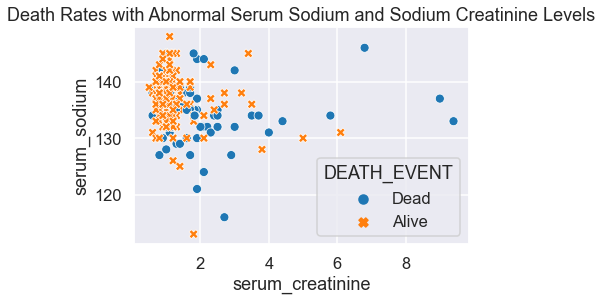

In [81]:
#Checking the number of deaths that occurred with serum sodium and serum creatinine abnormal levels 
sns.scatterplot(data=heart_records_data, x="serum_creatinine", y="serum_sodium", hue="DEATH_EVENT", style="DEATH_EVENT")
plt.title('Death Rates with Abnormal Serum Sodium and Sodium Creatinine Levels')

### Observation

* The number of deaths that occurred at the abnormal levels of serum sodium and serum creatinine is high.

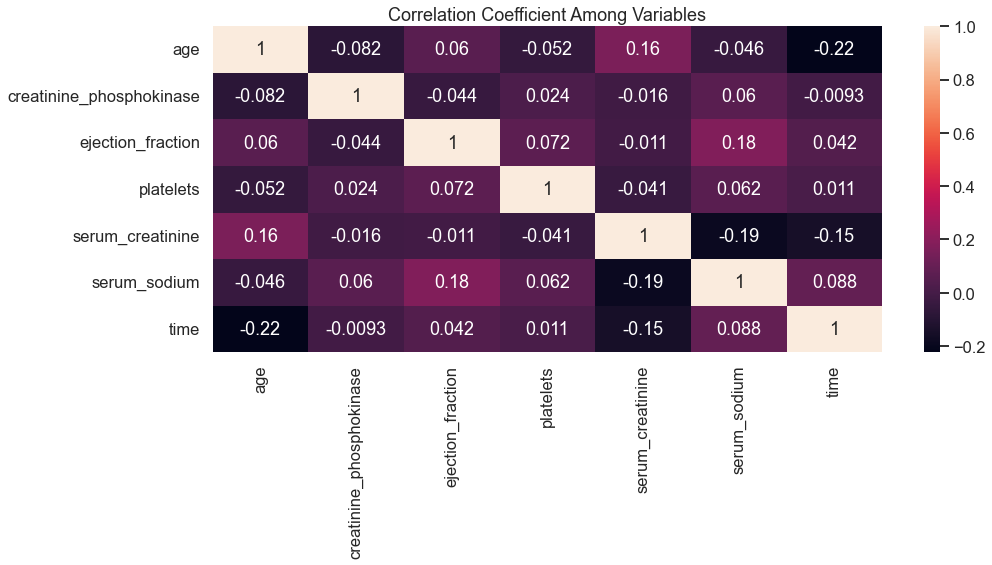

In [82]:
#Using heatmap to check the relationships among variables
plt.figure(figsize=(15,6))
sns.heatmap(heart_records_data.corr(),annot=True)
plt.title('Correlation Coefficient Among Variables')
plt.show()

### Observations:

* The correlations between the variables are weak, and mostly have negative values
* There is therefore no linear relationships among these variables 

*  <a href="https://www.investopedia.com/terms/c/correlationcoefficient.asp#toc-what-is-a-correlation-coefficient" target=" _blank">Correlation Coefficient</a>

Text(0.5, 1.0, 'Pairwise Relationships Among Variables')

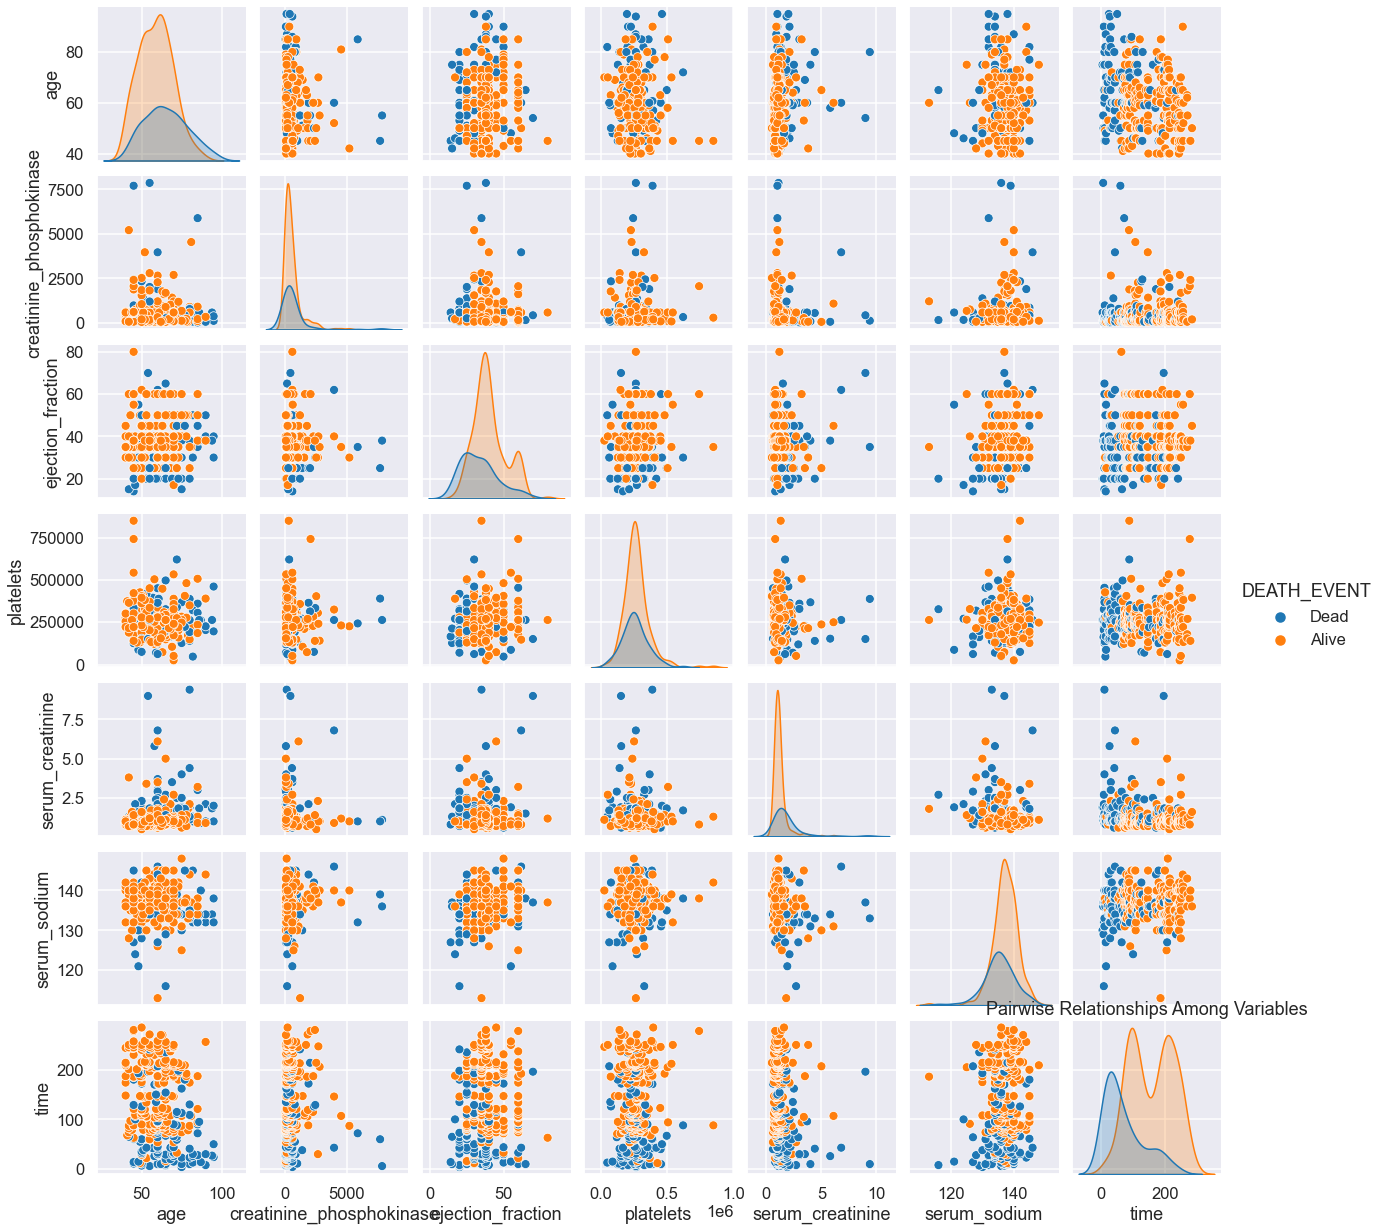

In [83]:
#Using pairplot to check the relationship among variables
sns.pairplot(heart_records_data[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium','time',
       'DEATH_EVENT']], hue="DEATH_EVENT")
plt.title('Pairwise Relationships Among Variables')

### Observations:

* Comparison of a variable against each other clearly showed that each variable recorded death when compared with another variable
* However, greater number of deaths were recorded in the comparision of time againt other variables
* This is understandable because time determines the serverity of these metrics which will eventually lead to death if no proactive steps are taken to control any abnormality 

### Correlation Analysis of the Likelihood of the Variables to Cause Death

#### DEATH EVENT variable has to be re-converted back to numerical data

In [87]:
#To convert the "DEATH_EVENT" information from "Alive and Dead" to "0 and 1" for easy correlation analysis
heart_records_data['DEATH_EVENT'].replace(['Alive', 'Dead'], [0,1], inplace=True)

In [88]:
#To check if the conversion has taken place
heart_records_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,Non-anaemic,582,Non-diabetic,20,Hypertensive,265000.00,1.9,130,Female,Non-smoker,4,1
1,55.0,Non-anaemic,7861,Non-diabetic,38,Non-hypertensive,263358.03,1.1,136,Female,Non-smoker,6,1
2,65.0,Non-anaemic,146,Non-diabetic,20,Non-hypertensive,162000.00,1.3,129,Female,Smoker,7,1
3,50.0,Anaemic,111,Non-diabetic,20,Non-hypertensive,210000.00,1.9,137,Female,Non-smoker,7,1
4,65.0,Anaemic,160,Diabetic,20,Non-hypertensive,327000.00,2.7,116,Male,Non-smoker,8,1


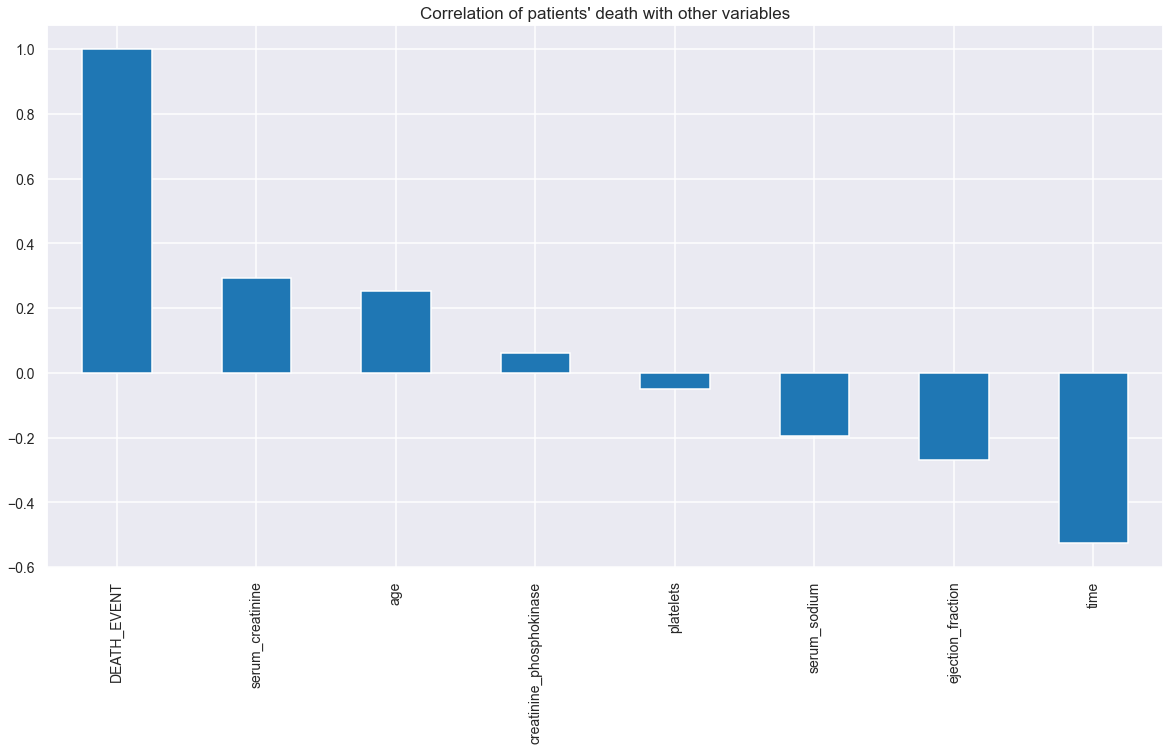

In [90]:
#Checking the correlation between patient's death and numerical data in the dataset
plt.figure(figsize=(20,10)) 
heart_records_data.corr()['DEATH_EVENT'].sort_values(ascending=False).plot(kind='bar') 
plt.title("Correlation of patients' death with other variables", fontsize=17) 
plt.tick_params(labelsize=14) 
plt.show()

### Observations:

* There is a reasonable positive correlation between serum creatinine level and the age of patient to lead to a patient's death
* There is a very strong negative correlation between time, ejection fraction and serum sodium to cause a patient's death.

## Statistical Analysis

In [91]:
def chi_test(column):
    chi2_stat, p, dof, expected = scipy.stats.chi2_contingency(pd.crosstab(heart_records_data[column], heart_records_data['DEATH_EVENT']))
    print(f"chi2 statistic:     {chi2_stat:.6g}")
    print(f"p-value:            {p}")
    print(f"degrees of freedom: {dof}")
    print("expected frequencies:\n",expected)
    if p<=0.05:
        print("Reject Null Hypothesis")
        print(f"There is a significant association between {column} and DEATH_EVENT.")
    else:
        print("Accept Null Hypthesis there is no association")

In [92]:
#Run a chi-square test on serum creatinine levels of patients
chi_test('serum_creatinine')

chi2 statistic:     92.4285
p-value:            3.1452364264229703e-06
degrees of freedom: 39
expected frequencies:
 [[ 0.67892977  0.32107023]
 [ 2.71571906  1.28428094]
 [12.89966555  6.10033445]
 [ 0.67892977  0.32107023]
 [16.29431438  7.70568562]
 [21.72575251 10.27424749]
 [33.94648829 16.05351171]
 [21.72575251 10.27424749]
 [ 7.46822742  3.53177258]
 [16.29431438  7.70568562]
 [13.57859532  6.42140468]
 [ 6.11036789  2.88963211]
 [ 3.39464883  1.60535117]
 [ 4.0735786   1.9264214 ]
 [ 6.11036789  2.88963211]
 [ 2.71571906  1.28428094]
 [ 5.43143813  2.56856187]
 [ 3.39464883  1.60535117]
 [ 0.67892977  0.32107023]
 [ 3.39464883  1.60535117]
 [ 0.67892977  0.32107023]
 [ 2.0367893   0.9632107 ]
 [ 1.35785953  0.64214047]
 [ 2.0367893   0.9632107 ]
 [ 2.0367893   0.9632107 ]
 [ 0.67892977  0.32107023]
 [ 1.35785953  0.64214047]
 [ 0.67892977  0.32107023]
 [ 0.67892977  0.32107023]
 [ 1.35785953  0.64214047]
 [ 0.67892977  0.32107023]
 [ 0.67892977  0.32107023]
 [ 0.67892977  0.32

In [93]:
#Run a chi-square test on the age of patients
chi_test('age')

chi2 statistic:     69.1471
p-value:            0.01522740643246055
degrees of freedom: 46
expected frequencies:
 [[ 4.75250836  2.24749164]
 [ 0.67892977  0.32107023]
 [ 4.75250836  2.24749164]
 [ 0.67892977  0.32107023]
 [ 1.35785953  0.64214047]
 [12.89966555  6.10033445]
 [ 2.0367893   0.9632107 ]
 [ 0.67892977  0.32107023]
 [ 1.35785953  0.64214047]
 [ 2.71571906  1.28428094]
 [18.33110368  8.66889632]
 [ 2.71571906  1.28428094]
 [ 3.39464883  1.60535117]
 [ 6.78929766  3.21070234]
 [ 1.35785953  0.64214047]
 [11.54180602  5.45819398]
 [ 0.67892977  0.32107023]
 [ 1.35785953  0.64214047]
 [ 6.78929766  3.21070234]
 [ 2.71571906  1.28428094]
 [22.40468227 10.59531773]
 [ 1.35785953  0.64214047]
 [ 2.71571906  1.28428094]
 [ 3.39464883  1.60535117]
 [ 5.43143813  2.56856187]
 [ 2.0367893   0.9632107 ]
 [17.65217391  8.34782609]
 [ 1.35785953  0.64214047]
 [ 1.35785953  0.64214047]
 [ 3.39464883  1.60535117]
 [ 2.0367893   0.9632107 ]
 [16.97324415  8.02675585]
 [ 4.75250836  2.24749

In [94]:
#Run a chi-square test on time 
chi_test('time')

chi2 statistic:     245.326
p-value:            6.590460363385011e-07
degrees of freedom: 147
expected frequencies:
 [[0.67892977 0.32107023]
 [0.67892977 0.32107023]
 [1.35785953 0.64214047]
 [1.35785953 0.64214047]
 [4.0735786  1.9264214 ]
 [1.35785953 0.64214047]
 [0.67892977 0.32107023]
 [0.67892977 0.32107023]
 [1.35785953 0.64214047]
 [1.35785953 0.64214047]
 [0.67892977 0.32107023]
 [1.35785953 0.64214047]
 [0.67892977 0.32107023]
 [1.35785953 0.64214047]
 [0.67892977 0.32107023]
 [2.0367893  0.9632107 ]
 [0.67892977 0.32107023]
 [1.35785953 0.64214047]
 [1.35785953 0.64214047]
 [3.39464883 1.60535117]
 [0.67892977 0.32107023]
 [0.67892977 0.32107023]
 [2.0367893  0.9632107 ]
 [0.67892977 0.32107023]
 [0.67892977 0.32107023]
 [0.67892977 0.32107023]
 [0.67892977 0.32107023]
 [0.67892977 0.32107023]
 [2.0367893  0.9632107 ]
 [0.67892977 0.32107023]
 [0.67892977 0.32107023]
 [0.67892977 0.32107023]
 [1.35785953 0.64214047]
 [0.67892977 0.32107023]
 [0.67892977 0.32107023]
 [2.0367

In [95]:
#Run a chi-square test on the sex of patients
chi_test('platelets')

chi2 statistic:     172.079
p-value:            0.5482703513757745
degrees of freedom: 175
expected frequencies:
 [[ 0.67892977  0.32107023]
 [ 0.67892977  0.32107023]
 [ 0.67892977  0.32107023]
 [ 0.67892977  0.32107023]
 [ 0.67892977  0.32107023]
 [ 0.67892977  0.32107023]
 [ 0.67892977  0.32107023]
 [ 0.67892977  0.32107023]
 [ 0.67892977  0.32107023]
 [ 0.67892977  0.32107023]
 [ 0.67892977  0.32107023]
 [ 0.67892977  0.32107023]
 [ 1.35785953  0.64214047]
 [ 0.67892977  0.32107023]
 [ 0.67892977  0.32107023]
 [ 1.35785953  0.64214047]
 [ 0.67892977  0.32107023]
 [ 1.35785953  0.64214047]
 [ 0.67892977  0.32107023]
 [ 1.35785953  0.64214047]
 [ 2.0367893   0.9632107 ]
 [ 0.67892977  0.32107023]
 [ 0.67892977  0.32107023]
 [ 2.0367893   0.9632107 ]
 [ 0.67892977  0.32107023]
 [ 0.67892977  0.32107023]
 [ 1.35785953  0.64214047]
 [ 0.67892977  0.32107023]
 [ 1.35785953  0.64214047]
 [ 1.35785953  0.64214047]
 [ 1.35785953  0.64214047]
 [ 0.67892977  0.32107023]
 [ 0.67892977  0.32107

## Insights, Recommendations and Gap

* It can be seen from these analyses that age is a parameter that is associated with CVDs and death; as one clocks 40 years, one should be more responsible for ones health so as to reduce health risks
* Creatinine phosphokinase is an enzyme that is present in small amount in the body: once there's an increase in its quantity, swift attention should be given to the individual so that the body does not enter into a shock that will harm the respiratoty system
* The prevalence of anaemia among different age brackets showed that anaemia is one of the first indicators of CVDs 
* There are more numbers of female smokers, and  more numbers of females with high blood pressure. Women play a lot of roles (wife, mother, cook, guardian, laundry woman, corporate professional) yet they are expected to keep things going and compete with their male counterparts that do little or no work at the homefront; this can lead to depression and stress both at home and at work places, to keep up with life, they could engage in some harmful practices that could sabotage their health in the future. I therefore, recommend counselling, recreational activities, some community services and networking at work places to reduce the pressure of work hence, improve mental and health well being of individuals
* Non-smokers have appreciable quantities of ejection fraction than smokers; this is misleading and should be discouraged because it is common knowledge that smoking is injurious to health. I see this as a gap that needs to be investigated further for clarity as to why it is so
* Age sometimes is not a good indicator for ailment; as it was observed that patients between the ages of 80 to 95 years had less cases of anaemia as against patients under 65 years old. This is a gap that needs to be further investigated; on the otherhand, rest, good eating habit with a lot of physical exercises may be a contributing factor to this trend 
* The correlation by heatmap showed weak correlation factors among variables making it difficult to ascertain the proportionality of these ailment to cause death
* Generally, the death rate was considerably low which indicate that with close monitoring, these ailment and symptoms will not always lead to death
* Correlation analysis showed that time is negatively linked to causing death in patient but the chi-square analysis showed that there is a significant association between time and death. This means that as time passes, the probability of one dying from any of these variables increases. 